In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import random as rn, math

## Defective Coin
#### Problem 1
A defective coin commiting machine produces coins whose probability of Heads is a random variable $Q$ with PDF
$$f_Q(q)=
\begin{cases}
5q^4,&\,\,\,\,\text{if $q\in[0, 1]$,}\\
0,&\,\,\,\text{otherwise}
\end{cases}$$
A coin produced by this machine is tossed repeatedly, with successive tosses assumed to be independent. Let $A$ be the event that the first toss of this coin results in Heads, and let $B$ be the event that the second toss of this coin results in Heads.

1. Find $\mathbb{P}(A)$

Apply the Law of Total Probability, we have
$$\mathbb{P}(A)=\int_{0}^{1}\mathbb{P}(A\,|\,Q=q)\,f_Q(q)\,dq=\int_{0}^{1}q\cdot(5q^4)\,dq=\frac{5q^5}{6}\Big|_{0}^{1}=\frac{5}{6}$$

2. Find the conditional PDF of  $Q$  given event  $A$.
\begin{align*}
f_{Q\,|\,A}(q)&=\frac{\mathbb{P}(A\,|\,Q=q)\,f_Q(q)}{\mathbb{P}(A)}\\
&=\frac{q\cdot(5q^4)}{5/6}\\
&=6q^5
\end{align*}

$$f_{Q\,|\,A}(q)=
\begin{cases}
6q^5,&\,\,\,\,0\leq q\leq 1,\\
0,&\,\,\,\text{otherwise}
\end{cases}$$

3. Find $\mathbb{P}(B\,|\,A)$
\begin{align*}
\mathbb{P}(B\,|\,A)&=\int_{0}^{1}\mathbb{P}(B\,|\,A,Q=q)\,f_{Q\,|\,A}(q)\,dq\\
&=\int_{0}^{1}\mathbb{P}(B\,|\,Q=q)\,f_{Q\,|\,A}(q)\,dq\\
&=\int_{0}^{1}q\cdot(6q^5)\\
&=\frac{6}{7}
\end{align*}

## Hypothesis Test Between Two Coins
#### Problem 2
Alice has two coins. The probability of Heads for the first coin is  $1/4$ , and the probability of Heads for the second is  $3/4$ . Other than this difference, the coins are indistinguishable. Alice chooses one of the coins at random and sends it to Bob. The random selection used by Alice to pick the coin to send to Bob is such that the first coin has a probability  $p$  of being selected. Assume that  $0<p<1$ . Bob tries to guess which of the two coins he received by tossing it  $3$  times in a row and observing the outcome. Assume that for any particular coin, all tosses of that coin are independent.

1. Given that Bob observed $k$ Heads out of the $3$ tosses (where $k=0, 1, 2, 3$), what is the conditional probability that he received the first coin?

Let $C$ be the coin that Bob receives so that $C=A$ indicates Bob receives the first coin and $C=B$ indicates Bob receives the second coin, let $H$ be the number of Heads being observed in three tosses.
\begin{align*}
\mathbb{P}(C=A\,|\,H=k)&=\frac{\mathbb{P}(H=k\,|\,C=A)\mathbb{P}(C=A)}{\mathbb{P}(H=k)}\\
&=\frac{\mathbb{P}(H=k\,|\,C=A)\mathbb{P}(C=A)}{\mathbb{P}(H=k\,|\,C=A)\mathbb{P}(C=A)+\mathbb{P}(H=k\,|\,C=B)\mathbb{P}(C=A)}\\
&=\frac{{3\choose k}(1/4)^{k}(3/4)^{3-k}p}{{3\choose k}(1/4)^{k}(3/4)^{3-k}p+{3\choose k}(3/4)^{k}(1/4)^{3-k}(1-p)}\\
&=\frac{3^{3-k}p}{3^{3-k}p+3^{k}(1-p)}
\end{align*}

2. We define an error to have occurred if Bob decides that he received one coin from Alice, but he actually received the other coin. He decides that he received the first coin when the number of Heads, $k$, that he observes on the $3$ tosses satisfies a certain condition. When one of the following conditions is used, Bob will minimize the probability of error.

As the probability of error needs to minimize, we will apply the MAP rule. In this case, Bob decides the coin he receives is the first one if 
$$P(C=A\,|\,H=k)\geq P(C=B\,|\,H=k)$$

By symmetry, we have 
$$\mathbb{P}(C=A\,|\,H=k)=\frac{3^{3-k}p}{3^{3-k}p+3^{k}(1-p)}$$
$$\mathbb{P}(C=B\,|\,H=k)=\frac{3^{3-k}(1-p)}{3^{3-k}p+3^{k}(1-p)}$$

So, 
\begin{align*}
\mathbb{P}(C=A\,|\,H=k)&\geq \mathbb{P}(C=B\,|\,H=k)\\
\frac{3^{3-k}p}{3^{3-k}p+3^{k}(1-p)}&\geq\frac{3^{k}(1-p)}{3^{3-k}p+3^{k}(1-p)}\\
3^{3-k}p&\geq3^{k}(1-p)\\
3^{2k-3}&\leq\frac{p}{1-p}\\
2k-3&\leq\log_3\left(\frac{p}{1-p}\right)\\
k&\leq\frac{3}{2}+\frac{1}{2}\log_3\left(\frac{p}{1-p}\right)
\end{align*}

3. For this part, assume that $p=3/4$.
    * What is the probability that Bob will guess the coin correctly using the decision rule from part 2?
    
    Plug $p$ into the threshold equation from problem 2, we have $k=2$. Let $G$ indicates Bob has the right guess.
    \begin{align*}
    \mathbb{P}(G)&=\mathbb{P}(G\,|\,C=A)\mathbb{P}(C=A)+\mathbb{P}(G\,|\,C=B)\mathbb{P}(C=B)\\
    &=\mathbb{P}(H\leq 2\,|\,C=A)\mathbb{P}(C=A)+\mathbb{P}(H=3\,|\,C=B)\mathbb{P}(C=B)\\
    &=(1-\mathbb{P}(H= 3\,|\,C=A))\mathbb{P}(C=A)+\mathbb{P}(H=3\,|\,C=B)\mathbb{P}(C=B)\\
    &=(1-(1/4)^3)\cdot(3/4)+(3/4)^3(1-3/4)\\
    &=\frac{216}{256}\\
    &=\frac{27}{32}
    \end{align*}
    
    * Suppose instead that Bob tries to guess which coin he received without tossing it. He still guesses the coin in order to minimize the probability of error. What is the probability that Bob will guess the coin currectly under this scenario?
    
    The probability that Alice picks coin 1 is $3/4$. If Bob wants to maximize his guessings, Bob should stick on coin 1. In this case, the probability that Bob will guess right is $3/4$.
    
4. Bob uses the decision rule of Part 2. If $p$ is samll, then Bob will always decide in favor of the second coin, ignoring the results of the three tosses. The range of such $p$'s is $[0, t)$. Find $t$.

We know that the probability of coin 1 results a head is $1/4$ and the probability of coin 2 results a head is $3/4$. If $p$ is small, then Alice prefers to select coin 2 which implies head has higher chances to be observed. Based on the threshold equation from part 2, if $k$ is positive, Bob tends in favor of coin 1; on the other hand, when $k$ is negative, Bob is on coin 2.
\begin{align*}
\frac{3}{2}+\frac{1}{2}\log_3\left(\frac{p}{1-p}\right)&<0\\
\log_3\left(\frac{p}{1-p}\right)&<-3\\
\frac{p}{1-p}&<\frac{1}{27}\\
p&<\frac{1}{28}
\end{align*}

In [2]:
def simulate_toss(coin):
    heads = 0; tails = 0
    
    for t in range(3):
        toss = np.random.uniform(0, 1)
        if toss <= coin:
            heads += 1
        else:
            tails += 1
        
    return heads, tails

def Alice(with_rules):
    if with_rules:
        if np.random.uniform(0, 1) <= 0.75:
            coin = {1: 0.25}
        else:
            coin = {2: 0.75}
            
    else:
        coin = rn.choice([{1: 0.25}, {2: 0.75}])
        
    return coin

def Bob(with_rules = False):
    coin = Alice(with_rules)
    c = list(coin.keys())[0]; p = coin[c]
    heads, tails = simulate_toss(p)
    
    if with_rules:
        if heads == 3:
            return "Bod guess Coin 2 and He received Coin {}".format(c)
        else:
            return "Bod guess Coin 1 and He received Coin {}".format(c)
    
    else:
        # assume if heads are more than tails, Bob guess he receives coin 2
        # different perspectives can apply
        if heads >= tails:
            return "Bod guess Coin 2 and He received Coin {}".format(c)
        else:
            return "Bod guess Coin 1 and He received Coin {}".format(c)

In [3]:
for trail in range(10):
    print(Bob(with_rules = False))

Bod guess Coin 2 and He received Coin 1
Bod guess Coin 1 and He received Coin 2
Bod guess Coin 2 and He received Coin 2
Bod guess Coin 2 and He received Coin 2
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 2 and He received Coin 2
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 2 and He received Coin 2
Bod guess Coin 1 and He received Coin 1


In [4]:
for trail in range(10):
    print(Bob(with_rules = True))

Bod guess Coin 1 and He received Coin 1
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 1 and He received Coin 2
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 1 and He received Coin 1
Bod guess Coin 2 and He received Coin 2


## Hypothesis Test With a Continuous Observation
#### Problem 3
Let $\Theta$ be a Bernoulli random variable that indicates which one of two hypotheses is true, and let $\mathsf{P}(\Theta=1)=p$. Under the hypothesis $\Theta=0$, the random variable $X$ has a normal distribution with mean $0$, and variance $1$. Under the alternative hypothesis $\Theta=1$, $X$ has a normal distribution with mean $2$ and variance $1$.

Consider the MAP rule for deciding between the two hypotheses, given that $X=x$.
1. Suppose for this part of the problem that $p=2/3$. The MAP rule can choose in favor of the hypothesis $\Theta=1$ if and only if $x\geq c_1$. Find the value of $c_1$.

In favor of hypothesis $\Theta=1$, we have
\begin{align*}
f_{X\,|\,\Theta}(x\,|\,\theta=1)\mathbb{P}(\Theta=1)&\geq f_{X\,|\,\Theta}(x\,|\,\theta=0)\mathbb{P}(\Theta=0)\\
\frac{1}{\sqrt{2\pi}}\exp{\left(-\frac{(x-2)^2}{2}\right)}p&\geq\frac{1}{\sqrt{2\pi}}\exp{\left(-\frac{x^2}{2}\right)}(1-p)\\
\frac{\exp{\left(-\frac{(x-2)^2}{2}\right)}}{\exp{\left(-\frac{x^2}{2}\right)}}&\geq\frac{1-p}{p}\\
\ln\left\{\frac{\exp{\left(-\frac{(x-2)^2}{2}\right)}}{\exp{\left(-\frac{x^2}{2}\right)}}\right\}&\geq\ln\left(\frac{1-p}{p}\right)\\
x^2-(x-2)^2&\geq2\ln\left(\frac{1-p}{p}\right)\\
x&\geq1+\frac{1}{2}\ln\left(\frac{1-p}{p}\right)
\end{align*}

As $p=2/3$, we have $c_1\approx0.6534$.

2. For this part, assume again that $p=2/3$. Find the conditional probability of error for the MAP decision rule, given that the hypothesis $\Theta=0$ is true.

An error occurs if we decide $\Theta=1$ given that the hypothesis $\Theta=0$; thus,
\begin{align*}
\mathbb{P}(\text{error}\,|\,\Theta=0)&=\mathbb{P}(X\geq c_1\,|\,\Theta=0)\\
&=1-\mathbb{P}(X< c_1\,|\,\Theta=0)\\
&=1-\Phi(c_1)\\
&\approx0.2578
\end{align*}

3. Find the overall (unconditional) probability of error associated with the MAP rule for $p=1/2$.

With $p=1/2$, we have $x\geq1+\frac{1}{2}\ln\left(\frac{1-p}{p}\right)=1$. Errors occur when we decide $X\geq 1$ if $\Theta=0$ or $X< 1$ if $\Theta = 1$.

\begin{align*}
\mathbb{P}(\text{error})&=\mathbb{P}(\text{error}\,|\,\Theta=0)\mathbb{P}(\Theta=0)+\mathbb{P}(\text{error}\,|\,\Theta=1)\mathbb{P}(\Theta=1)\\
&=\mathbb{P}(X\geq 1\,|\,\Theta=0)\mathbb{P}(\Theta=0)+\mathbb{P}(X < 1\,|\,\Theta=1)\mathbb{P}(\Theta=1\\
&=\mathbb{P}(X\geq 1\,|\,\Theta=0)\mathbb{P}(\Theta=0)+\mathbb{P}(X-2 < -1\,|\,\Theta=1)\mathbb{P}(\Theta=1)\\
&=(1-\Phi(1))\mathbb{P}(\Theta=1)+(1-\Phi(1))\mathbb{P}(\Theta=0)\\
&=\frac{1-\Phi(1)}{2}+\frac{1-\Phi(1)}{2}\\
&\approx0.1587
\end{align*}

## Trajectory Estimaton
#### Problem 4
The vertical coordinate ("height") of an object in free fall is described by an equation of the form
$$x(t)=\theta_0+\theta_1t+\theta_2t^2,$$
where $\theta_0, \theta_1, \theta_2$ are some parameters and $t$ stands for time. At certain times $t_1,\dots, t_n$, we make noisy observations $Y_1,\dots,Y_n$, respectively, of the height of the object. Based on these observations, we would like to estimate the object's vertical trajectory.

We consider the special case where there is only one unknown parameter. We assume that $\theta_0$ (the height of the object at time zero) is a known constant. We also assume that $\theta_2$ (which is related to the acceleration of the object) is known. We view $\theta_1$ as the realized value of a continuous random variable $\Theta_1$. The observed height at time $t_i$ is $Y_i=\theta_0+\Theta_1t_i+\theta_2t_i^2+W_i$, $i=1,\dots,n$, where $W_i$ models the observation noise. We assume that $\Theta_1\sim\mathrm{N}(0, 1), W_1,\dots,W_n\sim\mathrm{N}(0, \sigma^2)$, and that all these random variables are independent.

In this case, finding the MAP estimate of $\Theta_1$ involves the minimization of 
$$\theta_1^2+\frac{1}{\sigma^2}\sum_{i=1}^{n}(y_i-\theta_0-\theta_1t_i-\theta_2t_i^2)^2$$
with respect to $\theta_1$.

1. Find the formula for the MAP estimate, $\hat{\theta}_1$.

To minimize $\theta_1^2+\frac{1}{\sigma^2}\sum_{i=1}^{n}(y_i-\theta_0-\theta_1t_i-\theta_2t_i^2)^2$, we do the followings:

\begin{align*}
\frac{d}{d\,\theta_1}\left(\theta_1^2+\frac{1}{\sigma^2}\sum_{i=1}^{n}(y_i-\theta_0-\theta_1t_i-\theta_2t_i^2)^2\right)&=0\\
\theta_1+\frac{1}{\sigma^2}\sum_{i=1}^{n}-t_i(y_i-\theta_0-\theta_1t_i-\theta_2t_i^2)&=0\\
\sigma^2\theta_1+\sum_{i=1}^{n}-t_i(y_i-\theta_0-\theta_1t_i-\theta_2t_i^2)&=0\\
\sigma^2\theta_1+\sum_{i=1}^{n}-t_i(y_i-\theta_0-\theta_2t_i^2)+\theta_1\sum_{i=1}^{n}t_i^2&=0\\
\sigma^2\theta_1+\theta_1\sum_{i=1}^{n}t_i^2&=\sum_{i=1}^{n}t_i(y_i-\theta_0-\theta_2t_i^2)\\
\theta_1&=\frac{\sum_{i=1}^{n}t_i(y_i-\theta_0-\theta_2t_i^2)}{\sigma^2+\sum_{i=1}^{n}t_i^2}
\end{align*}

so, the MAP estimate 
$$\hat{\theta}_1=\frac{\sum_{i=1}^{n}t_i(y_i-\theta_0-\theta_2t_i^2)}{\sigma^2+\sum_{i=1}^{n}t_i^2}
$$

2. The formula $\hat{\theta}_1$ can be used to define the MAP estimator, $\hat{\Theta}_1$, as a function of $t_1,\dots,t_n$ and the random variables $Y_1,\dots,Y_n$. 

The MAP estimator $\hat{\Theta}_1$ has a normal distribution, because
\begin{align*}
\hat{\Theta}_1&=\frac{\sum_{i=1}^{n}t_i(Y_i-\theta_0-\theta_2t_i^2)}{\sigma^2+\sum_{i=1}^{n}t_i^2}\\
&=\frac{\sum_{i=1}^{n}t_i(\theta_0+\Theta_1t_i+\theta_2t_i^2+W_i-\theta_0-\theta_2t_i^2)}{\sigma^2+\sum_{i=1}^{n}t_i^2}\,\,\,\,\,\text{$Y_i=\theta_0+\Theta_1t_i+\theta_2t_i^2+W_i\,\,\forall i$}\\
&=\frac{\sum_{i=1}^{n}t_i(\Theta_1t_i+W_i)}{\sigma^2+\sum_{i=1}^{n}t_i^2}\\
&=\frac{\Theta_1\sum_{i=1}^{n}t_i^2+\sum_{i=1}^{n}W_it_i}{\sigma^2+\sum_{i=1}^{n}t_i^2}
\end{align*}

$\hat{\Theta}_1$ is a linear function of $\Theta_1$ and $W_1,\dots,W_n$, which are normal independent variables. Since a linear function of normal independent random variables is normal, $\hat{\Theta}_1$ inherents that property.

3. Let $\sigma=1$ and consider the special case of only two observations $(n=2)$. Write down a formula for the mean square error $\mathbb{E}[(\hat{\Theta}_1-\Theta_1)^2]$.

We have 
\begin{align*}
\hat{\Theta}_1-\Theta_1=\frac{\Theta_1\sum_{i=1}^{n}t_i^2+\sum_{i=1}^{n}W_it_i}{1+\sum_{i=1}^{n}t_i^2}-\Theta_1&=\frac{\Theta_1\sum_{i=1}^{n}t_i^2+\sum_{i=1}^{n}W_it_i-(1+\sum_{i=1}^{n}t_i^2)\Theta_1}{1+\sum_{i=1}^{n}t_i^2}\\
&=\frac{\sum_{i=1}^{n}W_it_i-\Theta_1}{1+\sum_{i=1}^{n}t_i^2}
\end{align*}

So,
\begin{align*}
\mathbb{E}[(\hat{\Theta}_1-\Theta_1)^2]&=\mathbb{E}\left[\left(\frac{\sum_{i=1}^{n}W_it_i-\Theta_1}{1+\sum_{i=1}^{2}t_i^2}\right)^2\right]\\
&=\frac{\mathbb{E}[(\sum_{i=1}^{n}W_it_i-\Theta_1)^2]}{(1+\sum_{i=1}^{2}t_i^2)^2}\\
&=\frac{\mathsf{Var}(\sum_{i=1}^{n}W_it_i-\Theta_1)}{(1+\sum_{i=1}^{2}t_i^2)^2}\,\,\,\text{$\mathsf{Var}\left(\sum_{i=1}^{n}W_it_i-\Theta_1\right)=\mathbb{E}\left[\left(\sum_{i=1}^{n}W_it_i-\Theta_1\right)^2\right]-\mathbb{E}\left[\sum_{i=1}^{n}W_it_i-\Theta_1\right]$}\\
&=\frac{\mathsf{Var}(\Theta_1)+t_1^2\mathsf{Var}(\Theta_1)+t_2^2\mathsf{Var}(\Theta_1)}{(1+\sum_{i=1}^{n}t_i^2)^2}\\
&=\frac{1+t_1^2+t_2^2}{(1+\sum_{i=1}^{2}t_i^2)^2}
\end{align*}

4. Consider the "experimental design" problem of choosing when to make measurements. Under the assumptions of the previous part, and under the constraints $0\leq t_1, t_2\leq 10$, find the values of $t_1$ and $t_2$ that minimize the mean squared error associated with the MAP estimator.


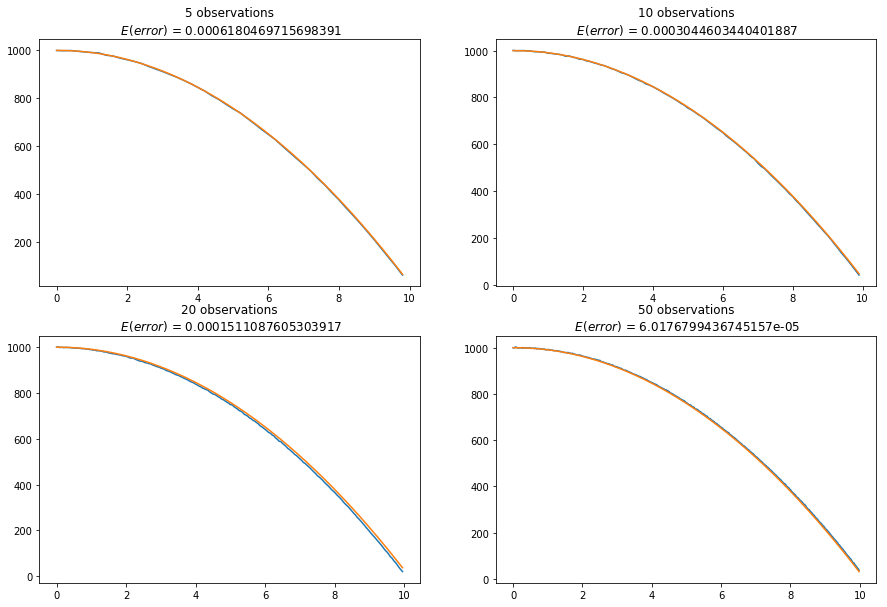

In [5]:
observations = [5, 10, 20, 50]
variance = 1
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

for i, o in enumerate(observations):
    t = np.arange(0, 10, 1/o)
    theta_0 = 1000; theta_1 = np.random.normal(0, 1); theta_2 = -9.81
    noise = np.random.normal(0, variance, o*10)
    expect_error = (variance+np.sum(t**2, axis = 0))/(variance+np.sum(t**2, axis = 0))**2
    Y = theta_0 + theta_1*t + theta_2*t**2 + noise
    x = theta_0 + 0.8*t + theta_2*t**2
    sns.lineplot(t, Y, ax = ax[i//2][i%2])
    sns.lineplot(t, x, ax = ax[i//2][i%2])
    ax[i//2][i%2].set_title("{} observations\n $E(error)$ = {}".format(o, expect_error))
    
plt.show()

## Hypothesis Test Between Two Normals
#### Problem 5
Conditioned on the result of an unbiased coin flip, the random variables $T_1, T_2,\dots, T_n$ are independent and identically distributed, each drawn from a common normal distribution with mean zero. If the result of the coin flip is Heads, this normal distribution has variance $1$; otherwise, it has variance $4$. Based on the observed values $t_1, t_2,\dots,t_n$, we use the MAP rule to decide whether the normal distribution from which they were deawn has variance $1$ or variance $4$. The MAP rule decides that the underlying normal distribution has variance $1$ if and only if 
$$\left|c_1\sum_{i=1}^{n}t_i^2+c_2\sum_{i=1}^{n}t_i\right|<1$$
Find the values of $c_1\geq 0$ and $c_2\geq 0$ such that this is true.

In order to apply the MAP rule to determine whether the normal distribution has $\sigma^2=1$, we need to satisfy the following inequality
$$\frac{p(t_1,t_2,\dots,t_n\,|\,\sigma^2=1)\,p(\sigma^2=1)}{p(t_1,t_2,\dots,t_n)}>\frac{p(t_1,t_2,\dots,t_n\,|\,\sigma^2=4)\,p(\sigma^2=4)}{p(t_1,t_2,\dots,t_n)}$$

As the coin is unbiased, we have $p(\sigma^2=1)=p(\sigma^2)=0.5$. Also, because of coditional independent, we have
$$p(t_1,t_2,\dots,t_n\,|\,\sigma^2=1)=\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}\cdot1}\exp\left\{\frac{-t_i^2}{2\cdot1}\right\}$$
$$p(t_1,t_2,\dots,t_n\,|\,\sigma^2=4)=\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}\cdot4}\exp\left\{\frac{-t_i^2}{2\cdot4}\right\}$$

Thus,
\begin{align*}
\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}\cdot1}\exp\left\{\frac{-t_i^2}{2\cdot1}\right\}&>\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}\cdot4}\exp\left\{\frac{-t_i^2}{2\cdot4}\right\}\\
\frac{1}{(2\pi)^{n/2}}\prod_{i=1}^{n}\exp\left\{\frac{-t_i^2}{2}\right\}&>\frac{1}{(2\pi)^{n/2}2^n}\prod_{i=1}^{n}\exp\left\{\frac{-t_i^2}{8}\right\}\\
\frac{1}{(2\pi)^{n/2}}\exp\left\{\frac{-1}{2}\sum_{i=1}^{n}t_i^2\right\}&>\frac{1}{(2\pi)^{n/2}2^n}\exp\left\{\frac{-1}{8}\sum_{i=1}^{n}t_i^2\right\}\\
2^n&>\frac{\exp\left\{\frac{-1}{8}\sum_{i=1}^{n}t_i^2\right\}}{\exp\left\{\frac{-1}{2}\sum_{i=1}^{n}t_i^2\right\}}\\
\ln(2^n)&>\ln\left(\frac{\exp\left\{\frac{-1}{8}\sum_{i=1}^{n}t_i^2\right\}}{\exp\left\{\frac{-1}{2}\sum_{i=1}^{n}t_i^2\right\}}\right)\\
n\ln(2)&>\frac{-1}{8}\sum_{i=1}^{n}t_i^2-\frac{-1}{2}\sum_{i=1}^{n}t_i^2\\
n\ln(2)&>\frac{3}{8}\sum_{i=1}^{n}t_i^2
\end{align*}